# Misc

Miscellaneous data.

# Title
Explaination:

# 1. Headline

> Info.

## 1.2. Section

Description.

- `Important list item`: Info.
1. **Regular list item**: Info.
- **Regular list item**: Info.

### *1.2.1. Sub-Section*

Description.

- `Important list item`: Info.
1. **Regular list item**: Info.
- **Regular list item**: Info.

	* Note.

# 1. Activation Functions

> Activation functions introduce non-linearity to the neural network. Common activation functions include sigmoid, tanh, and ReLU.

In [ ]:
import numpy as np

# Step function
def step(x):
    """
    Step function:
    - Returns 1 if x >= 0, 0 otherwise.
    """
    return np.where(x >= 0, 1, 0)

# Tanh function
def tanh(x):
    """
    Hyperbolic tangent (tanh) function:
    - Returns the hyperbolic tangent of x.
    """
    return np.tanh(x)

# Sigmoid function
def sigmoid(x):
    """
    Sigmoid function:
    - Returns the sigmoid activation of x.
    """
    return 1 / (1 + np.exp(-x))

# Softmax function
def softmax(x):
    """
    Softmax function:
    - Returns the softmax activation of x.
    """
    exps = np.exp(x - np.max(x, axis=1, keepdims=True))
    return exps / np.sum(exps, axis=1, keepdims=True)

# ReLU function
def relu(x):
    """
    Rectified Linear Unit (ReLU) function:
    - Returns max(0, x).
    """
    return np.maximum(0, x)

# Leaky ReLU function
def lrelu(x, alpha=0.01):
    """
    Leaky ReLU function:
    - Returns max(alpha * x, x).
    """
    return np.where(x >= 0, x, alpha * x)


# 2. Loss Functions

> Loss functions measure the error between the predicted output and the actual output. They are used to optimize the weights and biases of the neural network during training.

In [ ]:
import numpy as np

def mse_loss(y_true, y_pred):
	"""
	Mean Squared Error (MSE) loss function:
	Calculates the mean squared difference between the true and predicted values.
	
	Parameters:
	- y_true: numpy array, true values
	- y_pred: numpy array, predicted values
	
	Returns:
	- float, average squared error
	"""
	return np.mean((y_true - y_pred) ** 2)

def bce_loss(y_true, y_pred):
	"""
	Binary Cross Entropy (BCE) loss function:
	Calculates the binary cross entropy between the true and predicted values.
	
	Parameters:
	- y_true: numpy array, true values
	- y_pred: numpy array, predicted values
	
	Returns:
	- float, average cross entropy
	"""
	return -np.mean(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))

def cce_loss(y_true, y_pred):
	"""
	Categorical Cross Entropy (CCE) loss function:
	Calculates the categorical cross entropy between the true and predicted values.
	
	Parameters:
	- y_true: numpy array, true values
	- y_pred: numpy array, predicted values
	
	Returns:
	- float, average cross entropy
	"""
	return -np.mean(y_true * np.log(y_pred))

def custom_loss(y_true, y_pred):
	"""
	Custom loss function:
	Define your own loss function here.
	
	Parameters:
	- y_true: numpy array, true values
	- y_pred: numpy array, predicted values
	
	Returns:
	- float, loss value
	"""
	# Calculate the loss using your own formula
	loss = ...

	return loss


# 3. Gradient Descent

> Gradient descent is an optimization algorithm used to minimize the loss function. It adjusts the weights and biases of the neural network based on the gradients calculated during backpropagation.

In [ ]:
# Define the gradient function
def gradient(x, y, w, b):
    """
    Gradient function:
    Calculates the gradients of the loss function with respect to the weight and bias.
    
    Parameters:
    - x: numpy array, input data
    - y: numpy array, actual output
    - w: float, weight
    - b: float, bias
    
    Returns:
    - float, gradient of weight
    - float, gradient of bias
    """
    # Calculate the predicted values
    y_pred = w * x + b
    
    # Calculate the gradients of the loss function with respect to weight and bias
    dw = 2 * np.mean((y_pred - y) * x)
    db = 2 * np.mean(y_pred - y)
    
    return dw, db

# Define the gradient descent function
def gradient_descent(x, y, learning_rate, num_iterations):
    """
    Gradient Descent function:
    Updates the weight and bias using gradient descent.
    
    Parameters:
    - x: numpy array, input data
    - y: numpy array, actual output
    - learning_rate: float, learning rate
    - num_iterations: int, number of iterations
    
    Returns:
    - float, final weight
    - float, final bias
    """
    # Initialize the weight and bias
    w = 0
    b = 0
    
    # Perform gradient descent
    for i in range(num_iterations):
        # Calculate the gradients
        dw, db = gradient(x, y, w, b)
        
        # Update the weight and bias in the opposite direction of the gradient
        w -= learning_rate * dw
        b -= learning_rate * db
    
    return w, b

# Define the input data
x = np.array([1, 2, 3, 4, 5])
y = np.array([2, 4, 6, 8, 10])

# Set the learning rate and number of iterations
learning_rate = 0.01
num_iterations = 100

# Perform gradient descent
final_w, final_b = gradient_descent(x, y, learning_rate, num_iterations)

# Print the final weight and bias
print("Final Weight:", final_w)
print("Final Bias:", final_b)


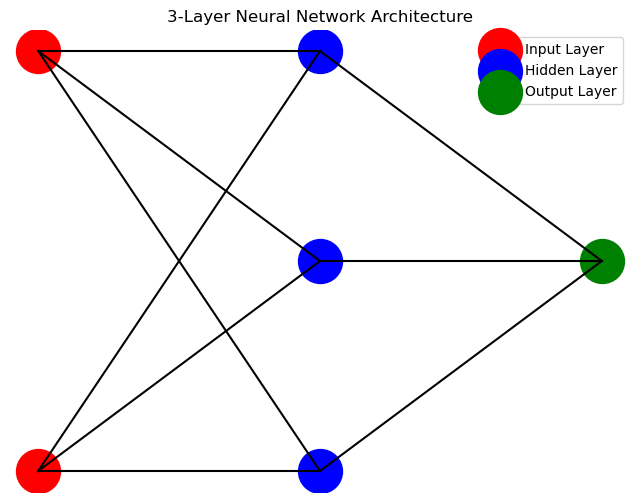

In [ ]:
# Set up the figure and axis
fig, ax = plt.subplots(figsize=(8, 6))

# Define the number of neurons for each layer
input_neurons = parameters['W1'].shape[1]
hidden_neurons = parameters['W1'].shape[0]
output_neurons = parameters['W2'].shape[0]

# Define the positions of the neurons
input_positions = np.zeros(input_neurons)
hidden_positions = np.ones(hidden_neurons)
output_positions = np.ones(output_neurons) + 1

# Draw the neurons
ax.scatter(input_positions, np.linspace(0, 1, input_neurons), s=1000, color='red', label='Input Layer')  # Input layer vertically centered
ax.scatter(hidden_positions, np.linspace(0, 1, hidden_neurons), s=1000, color='blue', label='Hidden Layer')  # Hidden layer vertically centered
ax.scatter(output_positions, np.full(output_neurons, 0.5), s=1000, color='green', label='Output Layer')  # Output layer in the middle

# Draw the connections
for i, input_neuron in enumerate(input_positions):
    for j, hidden_neuron in enumerate(hidden_positions):
        ax.plot([input_neuron, hidden_neuron], [np.linspace(0, 1, input_neurons)[i], np.linspace(0, 1, hidden_neurons)[j]], 'black')

for i, hidden_neuron in enumerate(hidden_positions):
    ax.plot([hidden_neuron, output_positions[0]], [np.linspace(0, 1, hidden_neurons)[i], 0.5], 'black')  # Connections to the middle

# Remove axes
ax.axis('off')

# Add legend and labels
ax.legend()
ax.set_title('3-Layer Neural Network Architecture')

plt.show()